In [ ]:
#!pip install gtts

In [3]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
from gtts import gTTS
import re
import cv2
import matplotlib.pyplot as plt

In [4]:
def ocr_core(filename):
    """
    This function will handle the core OCR processing of images.
    """
    img = cv2.imread(filename)
#     img = cv2.resize(img, None, fx = 4, fy=4, interpolation = cv2.INTER_CUBIC)
    plt.imshow(img)
    img = cv2.GaussianBlur(img, (5,5), 0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
#     img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


#     img = cv2.bilateralFilter(img, 9, 75, 75)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
#     gray = cv2.medianBlur(gray, 3)

    text = pytesseract.image_to_string(Image.fromarray(img).convert("RGB"), lang = "Hangul")#, config = "preserve_interword_spaces=1")#,config='-c preserve_interword_spaces=1x1 --psm 1 --oem 3')
#     text = pytesseract.image_to_string(Image.open(filename), lang = "hangul")  # We'll use Pillow's Image class to open the image and pytesseract to detect the string in the image
    return text



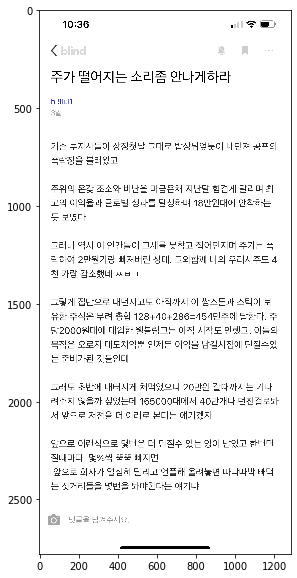

In [5]:
filename = "blind/IMG_3233.png"
img = cv2.imread(filename, )
#     img = cv2.resize(img, None, fx = 4, fy=4, interpolation = cv2.INTER_CUBIC)
plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()

# 1. Rescaling
    * The images that are rescaled are either shrunk or enlarged
        - INTER_AREA : interested in shrinking your image
        - INTER_CUBIC : need to scale the image to a larger size to recognize small characters
        - INTER_LINEAR :  to trade off some of your image quality for faster performance

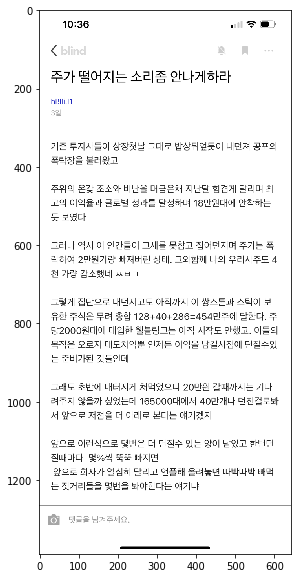

In [50]:
inter_area = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

plt.figure(figsize = (10, 10))
plt.imshow(inter_area)
plt.show()

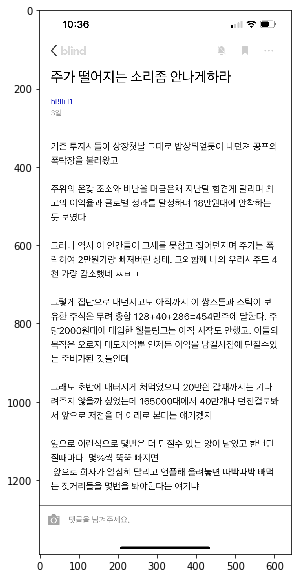

In [51]:
inter_cubic = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)

plt.figure(figsize = (10, 10))
plt.imshow(inter_cubic)
plt.show()

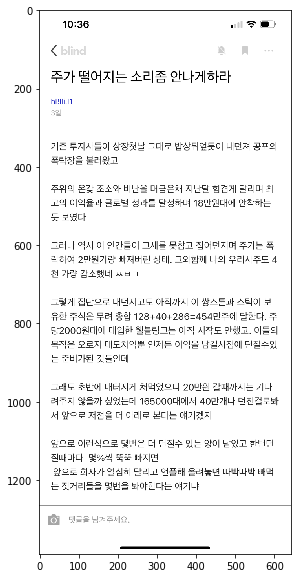

In [52]:
inter_linear = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

plt.figure(figsize = (10, 10))
plt.imshow(inter_linear)
plt.show()

# 2. Blurring
Image blurring is usually achieved by convolving the image with a low-pass filter kernel. While filters are usually used to blur the image or to reduce noise, there are a few differences between them.

### 2-1. Averaging 
After convolving an image with a normalized box filter, this simply takes the average of all the pixels under the kernel area and replaces the central element.

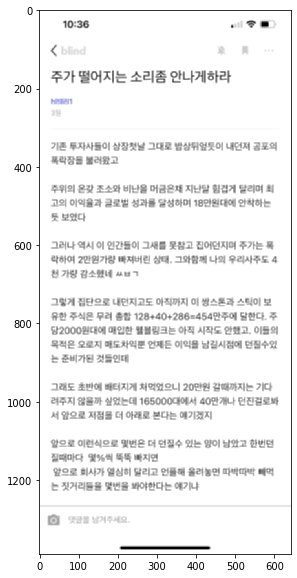

In [54]:
img = cv2.blur(inter_cubic, (5,5))
plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()

### 2-2. Gaussian blurring
This works in a similar fashion to Averaging, but it uses Gaussian kernel, instead of a normalized box filter, for convolution. Here, the dimensions of the kernel and standard deviations in both directions can be determined independently. Gaussian blurring is very useful for removing — guess what? — gaussian noise from the image. On the contrary, gaussian blurring does not preserve the edges in the input.



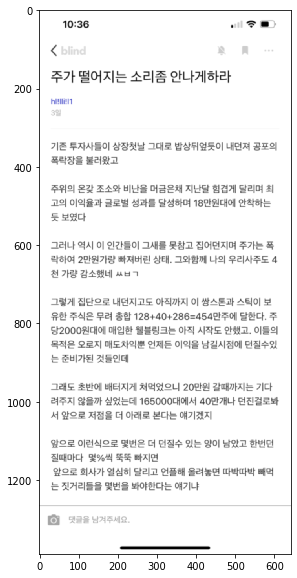

In [55]:
img = cv2.GaussianBlur(inter_cubic, (5,5), 0)
plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()

### 2-3. Median blurring
The central element in the kernel area is replaced with the median of all the pixels under the kernel. Particularly, this outperforms other blurring methods in removing salt-and-pepper noise in the images.

Median blurring is a non-linear filter. Unlike linear filters, median blurring replaces the pixel values with the median value available in the neighborhood values. So, median blurring preserves edges as the median value must be the value of one of neighboring pixels.

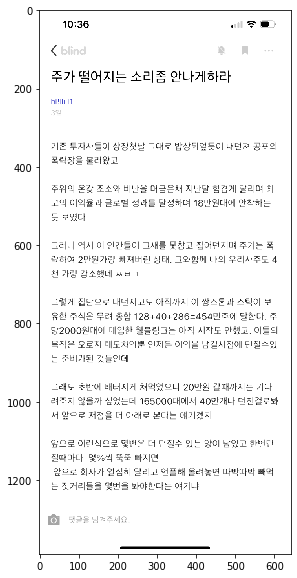

In [56]:
img = cv2.medianBlur(inter_cubic, 3)
plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()


# 3. Image Thresholding

There’s not a single image thresholding method that fits all types of documents. In reality, all filters perform differently on varying images. For instance, while some filters successfully binarize some images, they may fail to binarize others. Likewise, some filters may work well with those images that other filters cannot binarize well.

### 3-1.Simple Threshold
You might recall a friend of yours giving you some advice about your life by saying “things are not always black and white”. Well, for a simple threshold, things are pretty straight-forward.



In [76]:
cv2.threshold(img,127,255,cv2.THRESH_BINARY)


TypeError: Expected Ptr<cv::UMat> for argument 'src'

In [73]:

plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()


TypeError: Expected Ptr<cv::UMat> for argument 'src'

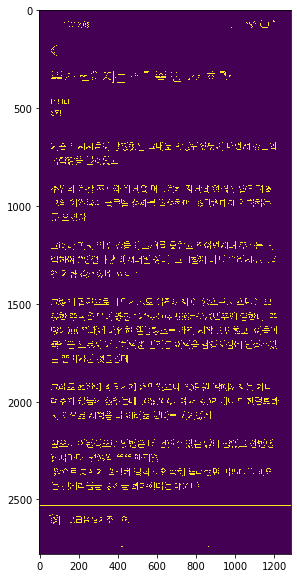

In [36]:
img = cv2.Canny(img, 100, 200)
plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()

'10:36 .\n\n)\n8\n\n<\n주가 떨어지는 소 리 좀 안 나 게 하라\n\nhit?\n\n주 위 의 온갖 조 소 와 비 난 을 머 금 은 채 지난달 힘겹게 달리며 최\n고 의 이 익 율 과 글로벌 성 과 를 달 성 하며 18 만 원 대 에 안 착 하는\n듯 보였다\n\n그러나 역시 이 인 간 들 이 그 새 를 못 참고 집 어 던지며 Wa 폭\n락 하여 2 만 원 가 량 빠 져 버린 상태. 그 와 함께 나의 우 리 사주\n\n팡 !\n\n으로 내 던 지 고 도 아 직 까지 이 쌍 스 톤 과 스 틱 이 보\n주 식 은 무려 총합 128+40+286=454 만 주 에 달한다. 주\n2000 원 대 에 매 입 한 웰 블 링 크 는 아직 시 작 도 안했고. 이 들 의\n오로지 매 도 차 익 뿐 언제든 이 익 을 남 길 시 점 에 던 질 수 있\n비 가 된 것 들 인데\n\n[ 앤 0 뽀\n\n= [0]\n것\nro\n\n머\n\n그래도 초 반 에 배 터 지게 처 먹 었으니 20 만 원 갈 때 까지는 기다\n려 주지 않을까 싶었는데 165000 대 에서 40 만 개나 던 진 걸 로 봐\n서 앞으로 저 점 을 더 아 래 로 본다는 얘 기 겠지\n\n앞으로 이 런 식 으로 몇 번 은 더 던 질 수 있는 양 이 남았고 한 번 단\n질 때 마다 몇 % 씩 뚝뚝 빠지면\n\n앞으로 회 사 가 열심히 달리고 언 플 해 올 려 놓\n짓 거 리 들을 몇 번 을 봐 야 한다는 얘 기 냐\n\n[ 묘\n무\n뜨\n료\n또\n모'

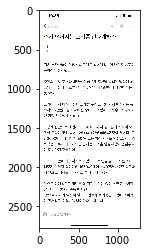

In [20]:
raw_text = ocr_core('blind/IMG_3233.png')
raw_text


In [3]:
raw_text = ocr_core('blind/IMG_3233.png')
raw_text


'10:36 .\n\n))\n8.\n\n<\n주가 떨어지는 소 리 좀 안 나 게 하라\n\nhl!\n\n)O ㅣ\n) J\n\n그\n\n존 투 자 사 들이 상 장 첫 날 그대로 밥 상 뒤 었 듯이 내던져 공 포 의\n라\n리 |\n\n주 위 의 온갖 조 소 와 비 난 을 머 금 은 채 지난달 힘겹게 달리며 최\n고 의 이 익 율 과 글로벌 성 과 를 달 성 하며 18 만 원 대 에 안 착 하는\n듯 보였다\n\n그러나 역시 이 인 간 들 이 그 새 를 못 참 고 집 어 던지며 주 가 는 폭\n\n락 하여 2 만 원 가 량 빠 져 버린 상태. 그 와 함께 나의 우 리 사 주 도 4\n\n천 가량 감 소 했네 씨 ㅁ ㄱ\n\n게 집 단 으로 내 던 지 고 도 아 직 까 지 이 쌍 스 톤 과 스 틱 이 보\n주 식 은 무려 총합 128+40+286=454 만 주 에 달한다.\n0 원 대 에 매 입 한 웰 블 링 크 는 아직 시 작 도 안했고. 이\n은 오로지 매 도 차 익 뿐 언제든 이 익 을 남 길 시 점 에 던질\n비 가 된 것 들 인데\n\n[ 왜 0 뽀\n! 오 개\n\n4 fun\n\n것\n> 으\n\n|r 개 30\n겨 은\n©\n©\n\n떠\n\n그래도 초 반 에 배 터 지게 처 먹 었으니 20 만 원 갈 때 까지는 기다\n려 주지 않을까 싶었는데 165000 대 에서 40 만 개나 던 진 걸 로 봐\n서 앞으로 저 점 을 더 아 래 로 본다는 얘 기 겠지\n\n앞으로 이 런 식 으로 몇 번 은 더 던질\n\n스 이 느\nZT 느 ©\n질 때 마다 몇 % 씩 뚝뚝 빠지면'

In [53]:
raw_text = ocr_core('blind/IMG_3233.png')
raw_text


'10:36 .\n\n))\n8.\n\n<\n주가 떨어지는 소 리 좀 안 나 게 하라\n\nhl!\n\n)O ㅣ\n) J\n\n그\n\n존 투 자 사 들이 상 장 첫 날 그대로 밥 상 뒤 었 듯이 내던져 공 포 의\n라\n리 |\n\n주 위 의 온갖 조 소 와 비 난 을 머 금 은 채 지난달 힘겹게 달리며 최\n고 의 이 익 율 과 글로벌 성 과 를 달 성 하며 18 만 원 대 에 안 착 하는\n듯 보였다\n\n그러나 역시 이 인 간 들 이 그 새 를 못 참 고 집 어 던지며 주 가 는 폭\n\n락 하여 2 만 원 가 량 빠 져 버린 상태. 그 와 함께 나의 우 리 사 주 도 4\n\n천 가량 감 소 했네 씨 ㅁ ㄱ\n\n게 집 단 으로 내 던 지 고 도 아 직 까 지 이 쌍 스 톤 과 스 틱 이 보\n주 식 은 무려 총합 128+40+286=454 만 주 에 달한다.\n0 원 대 에 매 입 한 웰 블 링 크 는 아직 시 작 도 안했고. 이\n은 오로지 매 도 차 익 뿐 언제든 이 익 을 남 길 시 점 에 던질\n비 가 된 것 들 인데\n\n[ 왜 0 뽀\n! 오 개\n\n4 fun\n\n것\n> 으\n\n|r 개 30\n겨 은\n©\n©\n\n떠\n\n그래도 초 반 에 배 터 지게 처 먹 었으니 20 만 원 갈 때 까지는 기다\n려 주지 않을까 싶었는데 165000 대 에서 40 만 개나 던 진 걸 로 봐\n서 앞으로 저 점 을 더 아 래 로 본다는 얘 기 겠지\n\n앞으로 이 런 식 으로 몇 번 은 더 던질\n\n스 이 느\nZT 느 ©\n질 때 마다 몇 % 씩 뚝뚝 빠지면'

In [57]:
tts = gTTS(text = raw_text, lang= "ko")
tts.save("ex.mp3")

In [25]:
raw_text = ocr_core('blind/IMG_3233.png')
raw_text


'10:36 .\n\n))\n8.\n\n<\n주가 떨어지는 소 리 좀 안 나 게 하라\n\nhl!\n\n)O ㅣ\n) J\n\n그\n\n존 투 자 사 들이 상 장 첫 날 그대로 밥 상 뒤 었 듯이 내던져 공 포 의\n라\n리 |\n\n주 위 의 온갖 조 소 와 비 난 을 머 금 은 채 지난달 힘겹게 달리며 최\n고 의 이 익 율 과 글로벌 성 과 를 달 성 하며 18 만 원 대 에 안 착 하는\n듯 보였다\n\n그러나 역시 이 인 간 들 이 그 새 를 못 참 고 집 어 던지며 주 가 는 폭\n\n락 하여 2 만 원 가 량 빠 져 버린 상태. 그 와 함께 나의 우 리 사 주 도 4\n\n천 가량 감 소 했네 씨 ㅁ ㄱ\n\n게 집 단 으로 내 던 지 고 도 아 직 까 지 이 쌍 스 톤 과 스 틱 이 보\n주 식 은 무려 총합 128+40+286=454 만 주 에 달한다.\n0 원 대 에 매 입 한 웰 블 링 크 는 아직 시 작 도 안했고. 이\n은 오로지 매 도 차 익 뿐 언제든 이 익 을 남 길 시 점 에 던질\n비 가 된 것 들 인데\n\n[ 왜 0 뽀\n! 오 개\n\n4 fun\n\n것\n> 으\n\n|r 개 30\n겨 은\n©\n©\n\n떠\n\n그래도 초 반 에 배 터 지게 처 먹 었으니 20 만 원 갈 때 까지는 기다\n려 주지 않을까 싶었는데 165000 대 에서 40 만 개나 던 진 걸 로 봐\n서 앞으로 저 점 을 더 아 래 로 본다는 얘 기 겠지\n\n앞으로 이 런 식 으로 몇 번 은 더 던질\n\n스 이 느\nZT 느 ©\n질 때 마다 몇 % 씩 뚝뚝 빠지면'

In [13]:
raw_text = ocr_core('blind/IMG_3233.png')
raw_text


'10:36 .\n\n+)\n.\n\n<\n주가 떨어지는 소 리 좀 안 나 게 하라\n\nhtt\n\n주 위 의 온갖 조 소 와 비 난 을 머 금 은 채 지난달 힘겹게 달리며 최\n고 의 이 익 율 과 글로벌 성 과 를 달 성 하며 18 만 원 대 에 안 착 하는\n듯 보였다\n\n전 가량 감 소 했네 % 브 ㄱ\n\n그렇게 집 단 으로 내 던 지 고 도 아 직 까 지 이 쌍 스 톤 과 스 틱 이 보\n유한 주 식 은 무려 총합 128+40+286=454 만 주 에 달한다. 주\n당 2000 원 대 에 매 입 한 웰 블 링 크 는 아직 시 작 도 안했고. 이 들 의\n목 적 은 오로지 매 도 차 익 뿐 언제든 이 익 을 남 길 시 점 에 던 질 수 있\n는 준 비 가 된 것 들 인데\n\n그래도 조 반 에 배 터 지게 처 먹 었으니 20 만 원 갈 때 까지는 기다\n려 주지 않을까 싶었는데 165000 대 에서 40 만 개나 던 진 걸 로 봐\n서 앞으로 저 점 을 더 아 래 로 본다는 얘 기 겠지\n\n앞으로 이 런 식 으로 몇 번 은 더 던 질 수 있는 양 이 남았고 한 번 던\n\n질 때 마다 키득 뚝뚝 빠지면\n| 달리고 언 플 해 올 려 놓 면 따 박 따 박 빼 먹\n\n|\n\n앞 심 ㅎ\n는 짓 거 기드 몇 번 을 봐 야 한다는 얘 기 나\n\n_\n\nHf\n이\n숙'

In [3]:
raw_text = ocr_core('blind/IMG_3233.png')
raw_text


"10:36 '\n\n˙))\n國\n\n《\n\n주 가 떨 어 지는 소 리 좀 안 나 게 하 라\n\nhitlit\nJ 沌 史 土 人 | 映 0| 史 同 烈 豈 二 H 口 皇 台 引 弭 史 0| 山 囡 刈 吳 巠 |\n폭 락 장 을 불 러 왔 고\n\n주 위 의 온 갖 조 소 와 비 난 을 머 금 은 채 지 난 달 힘 겹 게 달 리 며 최\n으 글 ㄷ O\n\n로 벌 성 과 를 달 성 하 며 18 만 원 대에 안 착 하 는\n\n그 러 나 역 시 이 인 간 들 이 그 새 를 못 참 고 집 어 던 지 며 주 가 는 폭\n\n락 하 여 2 만 원 가 량 빠 져 버 린 상 태 . 그 와 함 께 나 의 우 리 사 주 도 4\n\n句 7 豈 古 冬 島 山 H\n\n그 렇 게 집 단 으 로 내 던 지 고 도 아 직 까 지 이 쌍 스 톤 과 스 틱 이 보\n유 한 주 식 은 무 려 총 합 128+40+286=454 만 주 에 달 한 다 . 주\n당 2000 원 대에 매 입 한 웰 블 링 크 는 아 직 시 작 도 안 했 고 . 이 들 의\n목 적 은 오 로 지 매 도 차 익 뿐 언 제 든 이 익 을 남 길 시 점 에 던 질 수 있\n는 준 비 가 된 것 들 인 데\n\n그 래 도 초 반 에 배 터 지 게 처 먹 었 으 니 20 만 원 갈 때 까 지는 기다\n려 주 지 않 을 까 싶 었 는 데 165000 대 에 서 40 만 개 나 던 진 걸 로 봐\n서 앞 으 로 저 점 을 더 아 래 로 본 다 는 얘 기 겠 지\n\n민\n민\n거\n\n앞 으 로 이 런 식 으 로 몇 번 은\n질 때 마 다 몇 % 씩 뚝 뚝 빠 지 면\n앞 으 로 회 사 가 열 심 히\n는 짓 거 리 들 을 몇 번 을 봐 야 한 다 는 얘 기 냐\n\n삐\n띠\n口 『\n[ 오\n삐\n이\n咄\n巡\n매\n2\nE\nE\nB"

In [58]:
raw_text = ocr_core('blind/IMG_3233.png')
raw_text = re.sub(" ","",raw_text)
raw_text = re.sub("\n","",raw_text)
raw_text

'10:36.))8.<주가떨어지는소리좀안나게하라hl!)Oㅣ)J그존투자사들이상장첫날그대로밥상뒤었듯이내던져공포의라리|주위의온갖조소와비난을머금은채지난달힘겹게달리며최고의이익율과글로벌성과를달성하며18만원대에안착하는듯보였다그러나역시이인간들이그새를못참고집어던지며주가는폭락하여2만원가량빠져버린상태.그와함께나의우리사주도4천가량감소했네씨ㅁㄱ게집단으로내던지고도아직까지이쌍스톤과스틱이보주식은무려총합128+40+286=454만주에달한다.0원대에매입한웰블링크는아직시작도안했고.이은오로지매도차익뿐언제든이익을남길시점에던질비가된것들인데[왜0뽀!오개4fun것>으|r개30겨은©©떠그래도초반에배터지게처먹었으니20만원갈때까지는기다려주지않을까싶었는데165000대에서40만개나던진걸로봐서앞으로저점을더아래로본다는얘기겠지앞으로이런식으로몇번은더던질스이느ZT느©질때마다몇%씩뚝뚝빠지면'

In [59]:
tts = gTTS(text = raw_text, lang= "ko")
tts.save("ex.mp3")

In [60]:
raw_text = "협키 야이 새끼야!\n아직도 쳐 자고 있니?"
tts = gTTS(text = raw_text, lang= "ko")
tts.save("ex.mp3")

In [42]:
# !pip install finance-datareader
# !pip install mpl_finance

In [49]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mpl_finance import candlestick_ohlc
import numpy as np
import pandas as pd

In [64]:
df = fdr.DataReader('352820', '2020').reset_index()
df.tail()

,Date,Open,High,Low,Close,Volume,Change
43,2020-12-15,175500,175500,170500,172000,152204,-0.019943
44,2020-12-16,173000,174000,171000,173000,97010,0.005814
45,2020-12-17,169000,169000,160500,161500,1122966,-0.066474
46,2020-12-18,162500,164000,160500,162000,162232,0.003096
47,2020-12-21,162000,162000,157000,159000,76243,-0.018519


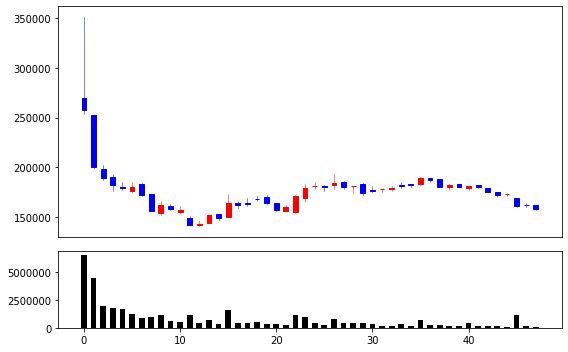

In [63]:
fig = plt.figure(figsize=(8, 5))
fig.set_facecolor('w')
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1], sharex=axes[0]))
axes[0].get_xaxis().set_visible(False)

x = np.arange(len(df.index))
df_int = df[['Open', 'High', 'Low', 'Close']].astype(int).values
the_df = np.hstack((np.reshape(x, (-1, 1)), df_int))

candlestick_ohlc(axes[0], the_df, width=0.5, colorup='r', colordown='b')
axes[1].bar(x, df.Volume, color='k', width=0.6, align='center')
plt.tight_layout()
plt.show()

In [138]:
from selenium import webdriver

from selenium.webdriver.chrome.options import Options

mobile_emulation = {

    "deviceMetrics": { "width": 360, "height": 640, "pixelRatio": 3.0 },

    "userAgent": "Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexus 5 Build/JOP40D) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.166 Mobile Safari/535.19" }

chrome_options = Options()

chrome_options.add_experimental_option("mobileEmulation", mobile_emulation)

driver = webdriver.Chrome(chrome_options = chrome_options)
driver.get('https://www.google.com')


/Users/jakang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: use options instead of chrome_options
  from ipykernel import kernelapp as app


In [140]:
# !pip install play_scraper

In [141]:
import play_scraper

In [145]:
play_scraper.developer('Disney', results = 5)

HTTPError: 405 Client Error: Method Not Allowed for url: https://play.google.com/store/apps/developer?id=Disney&hl=en&gl=us